<a href="https://colab.research.google.com/github/AntonThai2022/AntonThai2022/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

Создаём 100 точек

In [ ]:
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N,1)
noise = np.random.normal(scale=noise_scale, size=(N,1))
#Конвертировать форму y_np в (N, )
y_np = np.reshape(w_true * x_np + b_true + noise, (-1))

Визуализируем наши точки

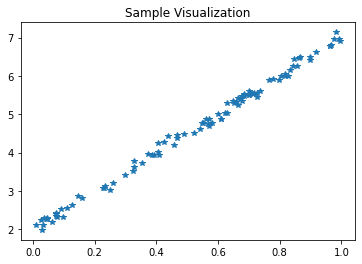

In [ ]:
plt.plot(x_np, y_np, '*')
plt.title("Sample Visualization")
plt.show()

Определение модели линейной регрессии

In [ ]:
with tf.name_scope("placaholders"):
  tf.compat.v1.disable_eager_execution()
  x = tf.compat.v1.placeholder(tf.float32, (N,1))
  y = tf.compat.v1.placeholder(tf.float32, (N,))  
with tf.name_scope("weights"):
  W = tf.Variable(tf.compat.v1.random_normal((1,1)))
  b = tf.Variable(tf.compat.v1.random_normal((1,)))
with tf.name_scope("prediction"):
  y_pred = tf.compat.v1.matmul(x, W) + b
with tf.name_scope("loss"):
  l = tf.compat.v1.reduce_sum((y - y_pred)**2)
with tf.name_scope("optim"):
  train_op = tf.compat.v1.train.AdamOptimizer(.001).minimize(l)
with tf.compat.v1.name_scope("summaries"):
  tf.summary.scalar("loss", l)
  merged = tf.compat.v1.summary.merge_all()

Тренировка модели линейной регрессии

In [ ]:
n_steps = 1000
with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  for i in range(n_steps):
    summary, loss = sess.run([train_op, l], feed_dict = {x: x_np, y:y_np})
    if(i % 100 == 0):
      print("шаг %d, потеря: %f" % (i, loss))

шаг 0, потеря: 294125.375000
шаг 100, потеря: 278499.812500
шаг 200, потеря: 263570.031250
шаг 300, потеря: 249318.062500
шаг 400, потеря: 235720.078125
шаг 500, потеря: 222753.187500
шаг 600, потеря: 210395.406250
шаг 700, потеря: 198625.750000
шаг 800, потеря: 187423.953125
шаг 900, потеря: 176770.531250
